#📌 1-Extracción

##Fuente: Archivos JSON (JAVA SCRIPT OBJECT NOTATION) | Fromato uniforme destino: DataFrame

In [ ]:

import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/carlos24520/DS-challenge-telecom-x/main/TelecomX_Data%20(1).json'
response = requests.get(url)
data = response.json()

df_telecomx = pd.DataFrame(data)

print(df_telecomx.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
df_telecomx.sample(5)

,customerID,Churn,customer,phone,internet,account
1914,2706-QZIHY,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
5782,7901-TBKJX,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3970,5433-KYGHE,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1990,2817-LVCPP,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
6121,8380-MQINP,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 2-Transformación y Limpieza de datos

## Conociendo el conjunto de datos

In [ ]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df_telecomx.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
df_telecomx.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


## Diccionario de datos


 - *customerID*: número de identificación único de cada cliente
 - *Churn*: si el cliente dejó   o no la empresa
 -  *gender*: género (masculino y femenino)
 -  *SeniorCitizen*: información sobre si un cliente tiene 65 años o más
 -  *Partner*: si el cliente tiene pareja o no
 -  *Dependents*: si el cliente tiene dependientes o no
 -  *tenure*: meses de contrato del cliente
 -  *PhoneService*: suscripción de servicio telefónico
 -  *MultipleLines*: suscripción a más de una línea de teléfono
 -  *InternetService*: suscripción a un proveedor de internet
 -  *OnlineSecurity*: suscripción adicional de seguridad online
 -  *OnlineBackup*: suscripción adicional de backup online
 -  *DeviceProtection*: suscripción adicional de protección en el dispositivo
 -  *TechSupport*: suscripción adicional de soporte técnico, menos tiempo de espera
 -  *StreamingTV*: suscripción de TV por cable
 -  *StreamingMovies*: suscripción de streaming de películas
 -  *Contract*: tipo de contrato
 -  *PaperlessBilling*: si el cliente prefiere recibir la factura online
 -  *PaymentMethod*: forma de pago
 -  *Charges.Monthly*: total de todos los servicios del cliente por mes
 -  *Charges.Total*: total gastado por el cliente

## Normalizando Archivo JSON

In [ ]:
# Normalizar las columnas
from pandas import json_normalize

df_telecomx_normalized = json_normalize(data)

df_telecomx_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df_telecomx_normalized.tail(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


## Validar

### 1.Valores unicos

In [ ]:
# Validar valores únicos por columna
for col in df_telecomx_normalized.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {df_telecomx_normalized[col].nunique()}")
  if df_telecomx_normalized[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_telecomx_normalized[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'customerID': 7267
------------------------------------------------------------
Valores únicos columna 'Churn': 3
Churn: ['No' 'Yes' '']
------------------------------------------------------------
Valores únicos columna 'customer.gender': 2
customer.gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'customer.SeniorCitizen': 2
customer.SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'customer.Partner': 2
customer.Partner: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.Dependents': 2
customer.Dependents: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.tenure': 73
------------------------------------------------------------
Valores únicos columna 'phone.PhoneService': 2
phone.PhoneService: ['Yes' 'No']
-------------------------------

### 2.Números duplicados

In [ ]:
# Validar si hay numeros duplicado
duplicados = df_telecomx_normalized.duplicated()
print(duplicados.sum())

0


### 3.Valores nulos

In [ ]:
# Validar si hay valores nulos
valores_nulos = df_telecomx_normalized.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


### 4.Valores en blanco o vacios

In [ ]:
# Validar si hay valores en blanco o vacios
valores_vacios = df_telecomx_normalized.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios[valores_vacios > 0])

Churn                    224
account.Charges.Total     11
dtype: int64


In [ ]:
# 224 registros tienen el campo 'Churn' con un string vacio y 11 regisros en la columna account.Charges.Total
df_telecomx_normalized[df_telecomx_normalized['Churn'].astype(str).str.strip()== '']
df_telecomx_normalized[df_telecomx_normalized['account.Charges.Total'].astype(str).str.strip()== '']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


#####1.Campo Churn valores con string vacio se asigna -1

In [ ]:
# Campo Churn : asigno nan porque es desconocido el porque el cliente dejo o no la empresa.
import numpy as np

# Reemplazar las cadenas vacías en la columna 'Churn' con NaN
df_telecomx_normalized['Churn'] = df_telecomx_normalized['Churn'].astype(str).str.strip().replace('', '-1')

In [ ]:
# Valido que ya quedao el campo sin valores con string vacio se cambiaron a nan
display(pd.unique(df_telecomx_normalized['Churn']))

array(['No', 'Yes', '-1'], dtype=object)

In [ ]:
df_telecomx_normalized[df_telecomx_normalized['Churn'].astype(str).str.strip()== '-1']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,-1,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,-1,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,-1,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,-1,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,-1,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,-1,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,-1,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,-1,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,-1,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


##### 2.Campo account.Charges.Total valores con string vacio se asigna 0

In [ ]:
# Campo account.Charges.Total : asigno 0 porque es desconocido el valor de pago porque puede ser un cliente nuevo que no ha generado la primera factura de pago.
# Reemplazar las cadenas vacías en la columna 'account.Charges.Total' con 0
df_telecomx_normalized['account.Charges.Total'] = df_telecomx_normalized['account.Charges.Total'].astype(str).str.strip().replace('', '0')

In [ ]:
df_telecomx_normalized[df_telecomx_normalized['account.Charges.Total'].astype(str).str.strip()== '0']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0


In [ ]:
df_telecomx_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### 5.Tipos de datos

In [ ]:
# Validar valores únicos ppor columna
for col in df_telecomx_normalized.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {df_telecomx_normalized[col].nunique()}")
  if df_telecomx_normalized[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_telecomx_normalized[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'customerID': 7267
------------------------------------------------------------
Valores únicos columna 'Churn': 3
Churn: ['No' 'Yes' '-1']
------------------------------------------------------------
Valores únicos columna 'customer.gender': 2
customer.gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'customer.SeniorCitizen': 2
customer.SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'customer.Partner': 2
customer.Partner: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.Dependents': 2
customer.Dependents: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.tenure': 73
------------------------------------------------------------
Valores únicos columna 'phone.PhoneService': 2
phone.PhoneService: ['Yes' 'No']
-----------------------------

In [ ]:
df_telecomx_normalized.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


#### Campo account.Charges.Total de object a float

In [ ]:
# Convertir la columna account.Charges.Total a tipo float
df_telecomx_normalized['account.Charges.Total'] = df_telecomx_normalized['account.Charges.Total'].astype(np.float64)
display(df_telecomx_normalized.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
df_telecomx_normalized['account.Charges.Total'].dtypes

dtype('float64')

#### Campos object , con valores Yes asignar 1, No asignar 0, y si hay un valor diferente asignar -1.

In [ ]:
columns_yes_no = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in columns_yes_no:
    # Versión eficiente para otras columnas
    df_telecomx_normalized[col] = [1 if x == 'Yes' else (0 if x == 'No' else -1) for x in df_telecomx_normalized[col]]
    # Convertir la columna con unicos valores Yes / No a Booleana
    #if df_telecomx_normalized[col].nunique() == 2:
    #  df_telecomx_normalized[col] = df_telecomx_normalized[col].astype(bool)
    #else:  # Convertir la columna con unicos valores Yes / No / Otro  a integer
    df_telecomx_normalized[col] = df_telecomx_normalized[col].astype(int)


# Verificación
for col in columns_yes_no:
    print(f"{col}: {df_telecomx_normalized[col].unique()}")

Churn: [ 0  1 -1]
customer.Partner: [1 0]
customer.Dependents: [1 0]
phone.PhoneService: [1 0]
phone.MultipleLines: [ 0  1 -1]
internet.OnlineSecurity: [ 0  1 -1]
internet.OnlineBackup: [ 1  0 -1]
internet.DeviceProtection: [ 0  1 -1]
internet.TechSupport: [ 1  0 -1]
internet.StreamingTV: [ 1  0 -1]
internet.StreamingMovies: [ 0  1 -1]
account.PaperlessBilling: [1 0]


In [ ]:
df_telecomx_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   int64  
 11  internet.OnlineBackup      7267 non-null   int64  
 12  internet.DeviceProtection  7267 non-null   int64  
 13  internet.TechSupport       7267 non-null   int64

Relación cambio de tipo de dato objetc a int, boolean o float

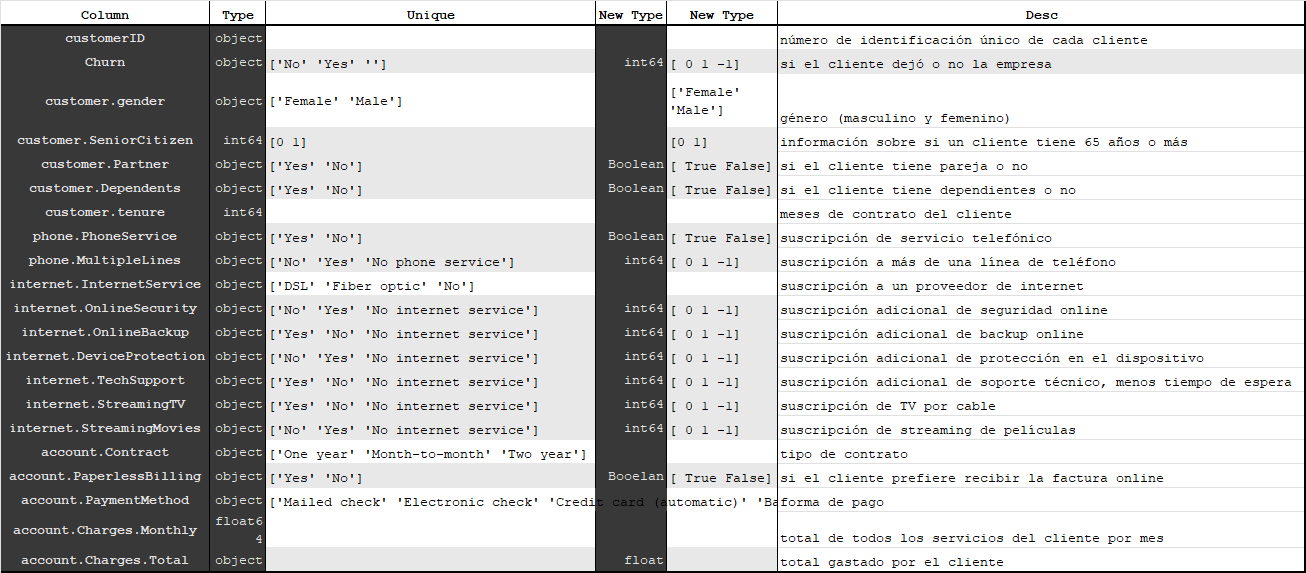

In [ ]:
for col in df_telecomx_normalized.columns:
  print(f"Valores únicos columna '{col}': {df_telecomx_normalized[col].nunique()}")
  if df_telecomx_normalized[col].nunique() < 20:
   print(col + ': ' + str(df_telecomx_normalized[col].unique()))
  print('-' * 60)

Valores únicos columna 'customerID': 7267
------------------------------------------------------------
Valores únicos columna 'Churn': 3
Churn: [ 0  1 -1]
------------------------------------------------------------
Valores únicos columna 'customer.gender': 2
customer.gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'customer.SeniorCitizen': 2
customer.SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'customer.Partner': 2
customer.Partner: [1 0]
------------------------------------------------------------
Valores únicos columna 'customer.Dependents': 2
customer.Dependents: [1 0]
------------------------------------------------------------
Valores únicos columna 'customer.tenure': 73
------------------------------------------------------------
Valores únicos columna 'phone.PhoneService': 2
phone.PhoneService: [1 0]
---------------------------------------------------------

## Manejo inconsistentes

## Estandarización

### Renombrar columnas

In [ ]:
df_telecomx_normalized.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelacion",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Adulto_Mayor",
    "customer.Partner": "Tiene_Pareja",
    "customer.Dependents": "Tiene_Dependientes",
    "customer.tenure": "Meses_Contrato",
    "phone.PhoneService": "Suscripcion_Servicio_Telefono",
    "phone.MultipleLines": "Suscripcion_Multiples_Lineas",
    "internet.InternetService": "Suscripcion_Servicio_Internet",
    "internet.OnlineSecurity": "Suscripcion_Seguridad_En_Linea",
    "internet.OnlineBackup": "Suscripcion_Respaldo_En_Linea",
    "internet.DeviceProtection": "Suscripcion_Proteccion_Dispositivo",
    "internet.TechSupport": "Suscripcion_Soporte_Técnico",
    "internet.StreamingTV": "Suscripcion_TV_Streaming",
    "internet.StreamingMovies": "Suscripcion_Películas_Streaming",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Factura_Electronica",
    "account.PaymentMethod": "Metodo_Pago",
    "account.Charges.Monthly": "Factura_Mensual",
    "account.Charges.Total": "Cargos_Totales"
}, inplace=True)

In [ ]:
df_telecomx_normalized.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
df_telecomx_normalized.dtypes

,0
ID_Cliente,object
Cancelacion,int64
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,int64
Tiene_Dependientes,int64
Meses_Contrato,int64
Suscripcion_Servicio_Telefono,int64
Suscripcion_Multiples_Lineas,int64
Suscripcion_Servicio_Internet,object


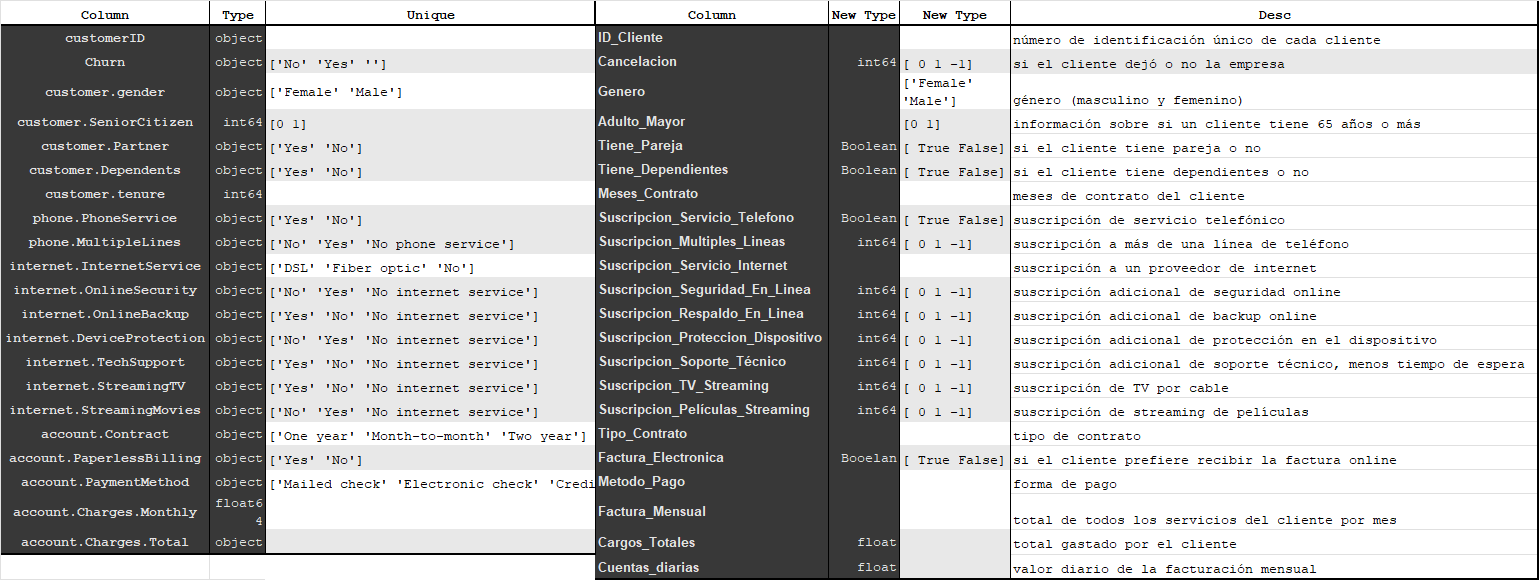

### Agregar columna cuentas diaria

In [ ]:
df_telecomx_normalized['Cuentas_diarias']=round(df_telecomx_normalized['Factura_Mensual']/30,1)

In [ ]:
df_telecomx_normalized['Cuentas_diarias'].dtype

dtype('float64')

#📊 3-Análisis Exploratorio de datos (EDA)

##Analisis descriptivo

###Datos numéricos

In [ ]:
df_telecomx_normalized.describe()

,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Factura_Electronica,Factura_Mensual,Cargos_Totales,Cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.226366,0.162653,0.484106,0.300124,32.346498,0.902711,0.324481,0.068391,0.127013,0.125224,0.071969,0.166369,0.169946,0.593230,64.720098,2277.182035,2.158745
std,0.486627,0.369074,0.499782,0.458343,24.571773,0.296371,0.643295,0.706329,0.738968,0.738062,0.708503,0.757553,0.759119,0.491265,30.129572,2268.648587,1.002283
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.000000


Se observa que hay 7267 clientes

###Datos texto

In [ ]:
datos_texto=df_telecomx_normalized[['Genero','Suscripcion_Servicio_Internet','Tipo_Contrato','Metodo_Pago']]
datos_texto.head(3)

,Genero,Suscripcion_Servicio_Internet,Tipo_Contrato,Metodo_Pago
0,Female,DSL,One year,Mailed check
1,Male,DSL,Month-to-month,Mailed check
2,Male,Fiber optic,Month-to-month,Electronic check


In [ ]:

datos_texto.describe()

,Genero,Suscripcion_Servicio_Internet,Tipo_Contrato,Metodo_Pago
count,7267,7267,7267,7267
unique,2,3,3,4
top,Male,Fiber optic,Month-to-month,Electronic check
freq,3675,3198,4005,2445


##Distribución de evasión (Activos / De baja) - Gráficos

Distribución de la variable "churn" (evasión) entre los clientes. Gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

###1. Distribución de evasión general

In [ ]:
cancelacon_general = df_telecomx_normalized['Cancelacion'].value_counts()
cancelacon_general_porcentaje = df_telecomx_normalized['Cancelacion'].value_counts(normalize=True) * 100
tasa_cancelacion_general = pd.concat([cancelacon_general, cancelacon_general_porcentaje], axis=1)
tasa_cancelacion_general.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']
display(tasa_cancelacion_general)

,Frecuencia Absoluta,Frecuencia Relativa (%)
Cancelacion,,
0,5174,71.198569
1,1869,25.719004
-1,224,3.082427


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df_telecomx_normalized, x='Cancelacion', nbins=3, title='Histograma Cancelacion', text_auto=True,
                   color='Cancelacion',
                   color_discrete_map={0: 'blue', 1: 'green', -1: 'yellow'})
fig.update_layout(title=dict(text='<b>Histograma Cancelacion</b>', font=dict(size=18)))
fig.update_xaxes(tickmode='array', tickvals=[-1, 0, 1], ticktext=['No definidos', 'Activos', 'De Baja'])

fig.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'Activos').replace('1', 'De Baja').replace("-1", 'No definidos')))

fig.show()

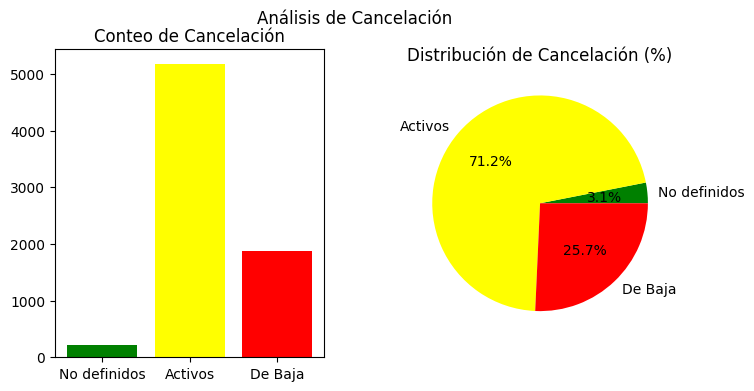

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

cancelacion_counts = df_telecomx_normalized['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

cancellation_labels = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion'].map(cancellation_labels)


fig, axs = plt.subplots(1, 2, figsize=(8, 4))

plt.subplots_adjust(wspace=0.3, hspace=0.4)

fig.suptitle('Análisis de Cancelación')

cancelacion_counts = cancelacion_counts.sort_values('Cancelacion')
axs[0].bar(cancelacion_counts['Cancelacion_Text'], cancelacion_counts['Count'], color=['green', 'yellow', 'red'])
axs[0].set_title('Conteo de Cancelación')



axs[1].pie(cancelacion_counts['Count'], labels=cancelacion_counts['Cancelacion_Text'], autopct='%1.1f%%', colors=['green', 'yellow', 'red'])
axs[1].set_title('Distribución de Cancelación (%)')


plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig_subplots = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                             subplot_titles=('Histograma de Cancelación', 'Distribución General de Cancelación (%)'))


cancelacion_counts = df_telecomx_normalized['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

cancellation_map = {0: 'Activos', 1: 'De Baja',-1: 'No definidos'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion'].map(cancellation_map)

colors = {'Activos': 'yellow', 'De Baja': 'red', 'No definidos': 'green'}

cancelacion_counts = cancelacion_counts.sort_values('Cancelacion')

for status, text_status in cancellation_map.items():
    subset = cancelacion_counts[cancelacion_counts['Cancelacion'] == status]
    if not subset.empty:
        fig_subplots.add_trace(go.Bar(x=[subset['Cancelacion_Text'].iloc[0]], y=[subset['Count'].iloc[0]],
                                     text=[subset['Count'].iloc[0]], textposition='auto',
                                     marker_color=colors[text_status],
                                     name=text_status,
                                     showlegend=True, legendgroup='group1'),
                              row=1, col=1)



if 'overall_churn_rate' not in locals() or overall_churn_rate is None:
    overall_churn_rate = df_telecomx_normalized['Cancelacion'].value_counts(normalize=True) * 100

overall_churn_rate_sorted = overall_churn_rate.sort_index()

labels = overall_churn_rate_sorted.index.map({0: 'Activos', 1: 'De Baja', -1: 'No definidos'}).tolist()
values = overall_churn_rate_sorted.values.tolist()


pie_colors_map = {-1: 'yellow', 0: 'green', 1: 'red'}
pie_colors = [pie_colors_map[i] for i in overall_churn_rate_sorted.index]


fig_subplots.add_trace(go.Pie(labels=labels, values=values, textinfo='percent+label', name='Cancelación General',
                              marker=dict(colors=pie_colors),
                              showlegend=True, legendgroup='group2'),
                       row=1, col=2)

fig_subplots.update_layout(height=400, showlegend=True,
                           title=dict(text='<b>Análisis de Cancelación</b>', font=dict(size=18), x=0.5, xanchor='center'),
                           legend=dict(x=0.5, y=0.5, xanchor='center', yanchor='middle'))

fig_subplots.show()

fig_subplots.write_html("1.analisis_cancelacion.html")
print("Gráfico exportado como 'analisis_cancelacion.html'")

Gráfico exportado como 'analisis_cancelacion.html'


###2. Distribución de evasión numerica no suscripcion ni facturacion (adulto mayor, tiene pareja, tiene dependientes, Factura_Electronica)

In [ ]:
cancelacon_adulto_mayor = df_telecomx_normalized['Adulto_Mayor'].value_counts()
cancelacon_adulto_mayor_porcentaje = df_telecomx_normalized['Adulto_Mayor'].value_counts(normalize=True) * 100
tasa_cancelacion_adulto_mayor = pd.concat([cancelacon_adulto_mayor, cancelacon_adulto_mayor_porcentaje], axis=1)
tasa_cancelacion_adulto_mayor.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']
display(tasa_cancelacion_adulto_mayor)

,Frecuencia Absoluta,Frecuencia Relativa (%)
Adulto_Mayor,,
0,6085,83.734691
1,1182,16.265309


In [ ]:

cancelacion_adulto_mayor = df_telecomx_normalized.groupby('Adulto_Mayor')['Cancelacion'].value_counts()
cancelacion_adulto_mayor_porcentaje = df_telecomx_normalized.groupby('Adulto_Mayor')['Cancelacion'].value_counts(normalize=True) * 100

tasa_cancelacion_adulto_mayor = pd.concat([cancelacion_adulto_mayor, cancelacion_adulto_mayor_porcentaje], axis=1)
tasa_cancelacion_adulto_mayor.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']

display(tasa_cancelacion_adulto_mayor)

Frecuencia Absoluta  Frecuencia Relativa (%)
Adulto_Mayor Cancelacion                                              
0             0                          4508                74.083813
              1                          1393                22.892358
             -1                           184                 3.023829
1             0                           666                56.345178
              1                           476                40.270728
             -1                            40                 3.384095

#### Funcion Validar Columnas Tipo Yes/No/Otro evaluando la cancelación

In [67]:
import plotly.express as px
from pandas import json_normalize

if 'df_telecomx_normalized' not in locals():
    url = 'https://raw.githubusercontent.com/carlos24520/DS-challenge-telecom-x/main/TelecomX_Data%20(1).json'
    response = requests.get(url)
    data = response.json()
    df_telecomx_normalized = json_normalize(data)

fig = px.histogram(
    df_telecomx_normalized,
    x='Genero',
    text_auto=True,
    color='Cancelacion',
    barmode='group',
    title='Histograma Cancelación por Género',
    color_discrete_map={
        0: 'black',
        1: 'yellow',
       -1: 'green'
    } # Added the missing closing parenthesis here
)


fig.update_layout(title=dict(text='<b>Histograma Cancelación por Género</b>', font=dict(size=18)))
fig.update_xaxes(tickmode='array', tickvals=[-1, 0, 1], ticktext=['No definidos', 'No Cancelaron', 'Cancelaron'])

fig.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'No Cancelaron').replace('1', 'Cancelaron').replace('-1', 'No definidos')))

fig.show()

#### Subplots Variables Numericas


In [68]:
binary_columns = ['Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Factura_Electronica']
cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}

cancellation_counts_by_binary_column = {}

for col in binary_columns:
    counts = df_telecomx_normalized.groupby([col, 'Cancelacion']).size().reset_index(name='Count')
    counts['Cancelacion_Text'] = counts['Cancelacion'].map(cancellation_map)
    cancellation_counts_by_binary_column[col] = counts

import plotly.graph_objects as go
from plotly.subplots import make_subplots

binary_columns=['Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Factura_Electronica']
fig_binary_subplots = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Adulto Mayor', 'Tiene Pareja', 'Tiene Dependientes', 'Factura Electrónica']
)
colors = {'Activos': 'green', 'De Baja': 'red', 'No definidos': 'yellow'}

subplot_positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, col in enumerate(binary_columns):
    counts_df = cancellation_counts_by_binary_column[col]
    row, col_pos = subplot_positions[i]

    ordered_cancellation_statuses = ['Activos', 'De Baja', 'No definidos']

    for status_text in ordered_cancellation_statuses:
         color = colors.get(status_text, 'gray')
         subset = counts_df[counts_df['Cancelacion_Text'] == status_text]

         if not subset.empty:
             fig_binary_subplots.add_trace(go.Bar(x=subset[col], y=subset['Count'],
                                                  name=status_text,
                                                  text=subset['Count'], textposition='auto',
                                                  marker_color=color,
                                                  showlegend=(i == 0)),
                                            row=row, col=col_pos)

fig_binary_subplots.update_layout(height=800, width=1000,
                                  title=dict(text='<b>Análisis de Cancelación por Variables Numéricas</b>', font=dict(size=20), x=0.5, xanchor='center'),
                                  barmode='group')

for i, col in enumerate(binary_columns):
    row, col_pos = subplot_positions[i]
    if col == 'Adulto_Mayor':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['No Adulto Mayor', 'Adulto Mayor'], row=row, col=col_pos)
    elif col == 'Tiene_Pareja':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['No Pareja', 'Tiene Pareja'], row=row, col=col_pos)
    elif col == 'Tiene_Dependientes':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['No Dependientes', 'Tiene Dependientes'], row=row, col=col_pos)
    elif col == 'Factura_Electronica':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['Factura Física', 'Factura Electrónica'], row=row, col=col_pos)

    fig_binary_subplots.update_yaxes(range=[0, 5000], row=row, col=col_pos)

fig_binary_subplots.show()

fig_binary_subplots.write_html("analisis_cancelacion_vbinarias.html")
print("Gráfico exportado como 'analisis_cancelacion_vbinarias.html'")

Gráfico exportado como 'analisis_cancelacion_vbinarias.html'


###Distribucion de evasión campos numericos Suscripciónes

In [69]:

subscription_columns = [
    'Suscripcion_Servicio_Telefono',
    'Suscripcion_Multiples_Lineas',
    'Suscripcion_Seguridad_En_Linea',
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Películas_Streaming'
]

for col in subscription_columns:
    fig_subscription = plot_churn_by_categorical(df_telecomx_normalized, col)

    if fig_subscription:
        fig_subscription.show()
        fig_subscription.write_html(f"analisis_cancelacion_{col}.html")
        print(f"Gráfico exportado como 'analisis_cancelacion_{col}.html'")



Gráfico exportado como 'analisis_cancelacion_Suscripcion_Servicio_Telefono.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Multiples_Lineas.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Seguridad_En_Linea.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Respaldo_En_Linea.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Proteccion_Dispositivo.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Soporte_Técnico.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_TV_Streaming.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Películas_Streaming.html'


#### Suscripcion - Conteo de Clientes por Estado de Cancelación y Servicio

In [70]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


subscription_columns = [
    'Suscripcion_Servicio_Telefono',
    'Suscripcion_Multiples_Lineas',
    'Suscripcion_Seguridad_En_Linea',
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Películas_Streaming'
]

cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}

all_service_churn_counts_yes = []

for col in subscription_columns:
    subscribed_customers_for_service = df_telecomx_normalized[df_telecomx_normalized[col] == 1 ].copy()


    counts_yes = subscribed_customers_for_service['Cancelacion'].value_counts().reset_index(name='Count')

    counts_yes['Service'] = col
    # Add a column to indicate this is the 'Yes' category count (useful for clarity in consolidated data)
    counts_yes['Service_Category'] = 'Yes'

    # Append to the list
    all_service_churn_counts_yes.append(counts_yes)

# Concatenate the counts from all services into a single DataFrame
# This DataFrame now contains counts for 'Yes' category for each service vs. cancellation status
consolidated_churn_counts_yes = pd.concat(all_service_churn_counts_yes, ignore_index=True)

# Map numerical cancellation status to text labels
consolidated_churn_counts_yes['Cancelacion_Text'] = consolidated_churn_counts_yes['Cancelacion'].map(cancellation_map)

# Optional: Map service column names to more readable labels for the x-axis
service_name_map = {
    'Suscripcion_Servicio_Telefono': 'Servicio Telefono',
    'Suscripcion_Multiples_Lineas': 'Multiples Lineas',
    'Suscripcion_Seguridad_En_Linea': 'Seguridad En Linea',
    'Suscripcion_Respaldo_En_Linea': 'Respaldo En Linea',
    'Suscripcion_Proteccion_Dispositivo': 'Proteccion Dispositivo',
    'Suscripcion_Soporte_Técnico': 'Soporte Técnico',
    'Suscripcion_TV_Streaming': 'TV Streaming',
    'Suscripcion_Películas_Streaming': 'Películas Streaming'
}
consolidated_churn_counts_yes['Service_Name'] = consolidated_churn_counts_yes['Service'].map(service_name_map)

active_counts = consolidated_churn_counts_yes[consolidated_churn_counts_yes['Cancelacion_Text'] == 'Activos'].groupby('Service_Name')['Count'].sum().reset_index()
active_counts_sorted = active_counts.sort_values('Count', ascending=False)

ordered_services = active_counts_sorted['Service_Name'].tolist()



fig = px.bar(consolidated_churn_counts_yes,
             x='Service_Name',
             y='Count',
             color='Cancelacion_Text',
             barmode='group',
             title='Conteo de Clientes Suscritos por Servicio y Estado de Cancelación',
             labels={'Service_Name': 'Servicio de Suscripción', 'Count': 'Conteo de Clientes', 'Cancelacion_Text': 'Estado de Cancelación'},
             category_orders={'Cancelacion_Text': ['Activos', 'De Baja', 'No definidos'],
                              'Service_Name': ordered_services},
             color_discrete_map={'Activos': 'green', 'De Baja': 'red', 'No definidos': 'yellow'},
             text='Count'
            )

fig.update_layout(
    legend_title='Estado de Cancelación',
    yaxis_title='Conteo de Clientes Suscritos'
)


fig.show()

##Recuento de evasión por variables categóricas

###2. Distribución de evasión por variables categoricas

In [ ]:
# Calcular la frecuencia absoluta y relativa de Cancelacion por Genero
cancelacion_por_genero = df_telecomx_normalized.groupby('Genero')['Cancelacion'].value_counts()
cancelacion_por_genero_percentaje = df_telecomx_normalized.groupby('Genero')['Cancelacion'].value_counts(normalize=True) * 100

# Renombrar las columnas para mayor claridad
cancelacion_por_genero.columns = ['No Cancelacion', 'Cancelacion', 'Cancelacion Desconocida']
cancelacion_por_genero_percentaje.columns = ['No Cancelacion (%)', 'Cancelacion (%)', 'Cancelacion Desconocida (%)']

# Combinar las frecuencias absolutas y relativas en un solo DataFrame
cancelacion_por_genero_resumen = pd.concat([cancelacion_por_genero, cancelacion_por_genero_percentaje], axis=1)

display(cancelacion_por_genero_resumen)

count  proportion
Genero Cancelacion                   
Female  0            2549   70.963252
        1             939   26.141425
       -1             104    2.895323
Male    0            2625   71.428571
        1             930   25.306122
       -1             120    3.265306

In [71]:
fig = px.histogram(df_telecomx_normalized, x = 'Genero', text_auto = True, color = 'Cancelacion', barmode = 'group', title ='Histograma Cancelación por Género',
                   color_discrete_map={0: 'green', 1: 'red', -1: 'yellow'})

fig.update_layout(title=dict(text='<b>Histograma Cancelación por Género</b>', font=dict(size=18)))
fig.update_xaxes(tickmode='array', tickvals=[-1, 0, 1], ticktext=['No definidos', 'No Cancelaron', 'Cancelaron'])

fig.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'No Cancelaron').replace('1', 'Cancelaron').replace('-1', 'No definidos')))

fig.show()



```
# Esto tiene formato de código
```

###3. Distribución de evasión categorica (Genero, Suscripcion_Servicio_Internet,Tipo_Contrato, Metodo_Pago)

In [ ]:
#Columnas Categoricas

# Columna 'Genero'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Genero')
if fig_gender:
    fig_gender.show()

# Columna 'Suscripcion_Servicio_Internet'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Suscripcion_Servicio_Internet')
if fig_gender:
    fig_gender.show()


# Columna 'Tipo_Contrato'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Tipo_Contrato')
if fig_gender:
    fig_gender.show()


# Columna 'Metodo_Pago'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Metodo_Pago')
if fig_gender:
    fig_gender.show()

###4. Subplots Variables Categoricas

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df_telecomx_normalized is available and has the 'Cancelacion_Text' column

categorical_columns = ['Genero', 'Suscripcion_Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']
cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}

cancellation_counts_by_categorical_column = {}

for col in categorical_columns:
    counts = df_telecomx_normalized.groupby([col, 'Cancelacion']).size().reset_index(name='Count')
    counts['Cancelacion_Text'] = counts['Cancelacion'].map(cancellation_map)
    cancellation_counts_by_categorical_column[col] = counts


fig_categorical_subplots = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Género', 'Servicio de Internet', 'Tipo de Contrato', 'Método de Pago']
)


colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'}

subplot_positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, col in enumerate(categorical_columns):
    counts_df = cancellation_counts_by_categorical_column[col]
    row, col_pos = subplot_positions[i]

    ordered_cancellation_statuses = ['Activos', 'De Baja', 'No definidos']

    for status_text in ordered_cancellation_statuses:
         color = colors.get(status_text, 'gray')
         subset = counts_df[counts_df['Cancelacion_Text'] == status_text]

         if not subset.empty:
             fig_categorical_subplots.add_trace(go.Bar(x=subset[col], y=subset['Count'],
                                                       name=status_text,
                                                       text=subset['Count'], textposition='auto',
                                                       marker_color=color,
                                                       showlegend=(i == 0)),
                                              row=row, col=col_pos)

fig_categorical_subplots.update_layout(height=800, width=1000,
                                       title=dict(text='<b>Análisis de Cancelación por Variables Categóricas</b>', font=dict(size=20), x=0.5, xanchor='center'),
                                       barmode='group')

for i, col in enumerate(categorical_columns):
    row, col_pos = subplot_positions[i]
    if col == 'Genero':
        fig_categorical_subplots.update_xaxes(title_text='Género', row=row, col=col_pos)
    elif col == 'Suscripcion_Servicio_Internet':
        fig_categorical_subplots.update_xaxes(title_text='Servicio de Internet', row=row, col=col_pos)
    elif col == 'Tipo_Contrato':
        fig_categorical_subplots.update_xaxes(title_text='Tipo de Contrato', row=row, col=col_pos)
    elif col == 'Metodo_Pago':
        fig_categorical_subplots.update_xaxes(title_text='Método de Pago', row=row, col=col_pos)

    fig_categorical_subplots.update_yaxes(range=[0, 3000], row=row, col=col_pos)


fig_categorical_subplots.show()

fig_categorical_subplots.write_html("analisis_cancelacion_vcategoricas.html")
print("Gráfico exportado como 'analisis_cancelacion_vcategoricas.html'")

Gráfico exportado como 'analisis_cancelacion_vcategoricas.html'


##4. Conteo de evasión por variables numéricas

### Grafico de Caja


In [72]:
import pandas as pd
import plotly.express as px

def plot_boxplot_vs_churn(df, y_column, churn_column='Cancelacion'):
    """
    Genera un gráfico de caja de una columna numérica vs. estado de cancelación.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        y_column (str): Nombre de la columna numérica para el eje Y.
        churn_column (str): Nombre de la columna de cancelación (por defecto 'Cancelacion').

    Returns:
        go.Figure or None: Objeto figura de Plotly si es exitoso, None si hay un error.
    """
    # Validar si las columnas existen
    if y_column not in df.columns:
        print(f"Error: La columna '{y_column}' no existe en el DataFrame.")
        return None
    if churn_column not in df.columns:
        print(f"Error: La columna de cancelación '{churn_column}' no existe en el DataFrame.")
        return None

    # Asegurarse de que la columna de cancelación tenga las etiquetas de texto para el eje X y color
    # Crear una columna temporal con las etiquetas de texto si no existe
    churn_text_column_name = f'{churn_column}_Text'
    if churn_text_column_name not in df.columns:
         cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
         # Avoid modifying the original DataFrame if possible, work on a copy or temporary Series
         churn_text_series = df[churn_column].map(cancellation_map)
    else:
         churn_text_series = df[churn_text_column_name]


    # Definir el orden y colores para los estados de cancelación (usando las etiquetas de texto)
    cancellation_order = ['Activos', 'De Baja', 'No definidos']
    cancellation_colors = {'Activos': 'green', 'De Baja': 'red', 'No definidos': 'yellow'} # Use text labels as keys


    fig = px.box(df,
                 x = churn_text_series,
                 y = y_column,
                 color = churn_text_series,
                 category_orders={'x': cancellation_order},
                 color_discrete_map=cancellation_colors,
                 title=f'Distribución de {y_column.replace("_", " ")} por Estado de Cancelación - {y_column}'
                )

    fig.update_layout(
        xaxis_title='Estado de Cancelación',
        yaxis_title=y_column.replace("_", " "),
        legend_title='Estado de Cancelación'
    )

    return fig

In [73]:
fig_meses = plot_boxplot_vs_churn(df_telecomx_normalized, 'Meses_Contrato')
if fig_meses:
  fig_meses.show()

fig_cargos_mensuales = plot_boxplot_vs_churn(df_telecomx_normalized, 'Factura_Mensual')
if fig_cargos_mensuales:
  fig_cargos_mensuales.show()

fig_cargos_totales = plot_boxplot_vs_churn(df_telecomx_normalized, 'Cargos_Totales')
if fig_cargos_totales:
  fig_cargos_totales.show()

fig_cargos_totales = plot_boxplot_vs_churn(df_telecomx_normalized, 'Cuentas_diarias')
if fig_cargos_totales:
  fig_cargos_totales.show()

/tmp/ipython-input-74-2850172283.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




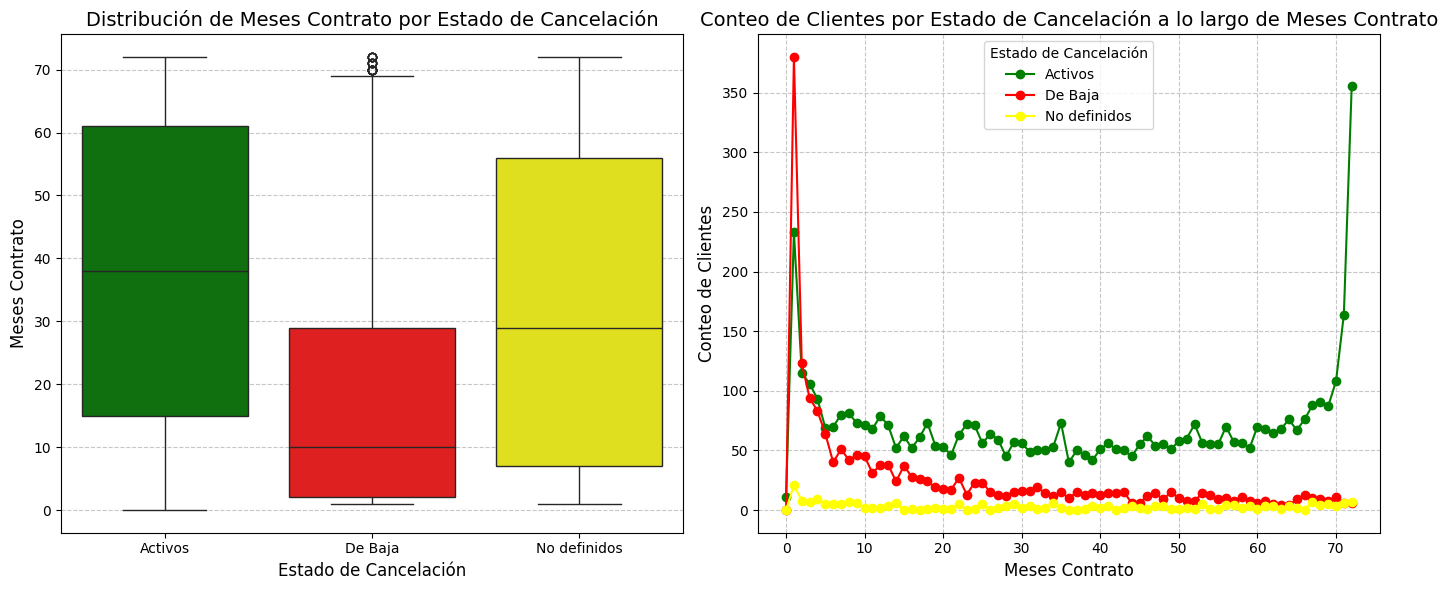

/tmp/ipython-input-74-2850172283.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




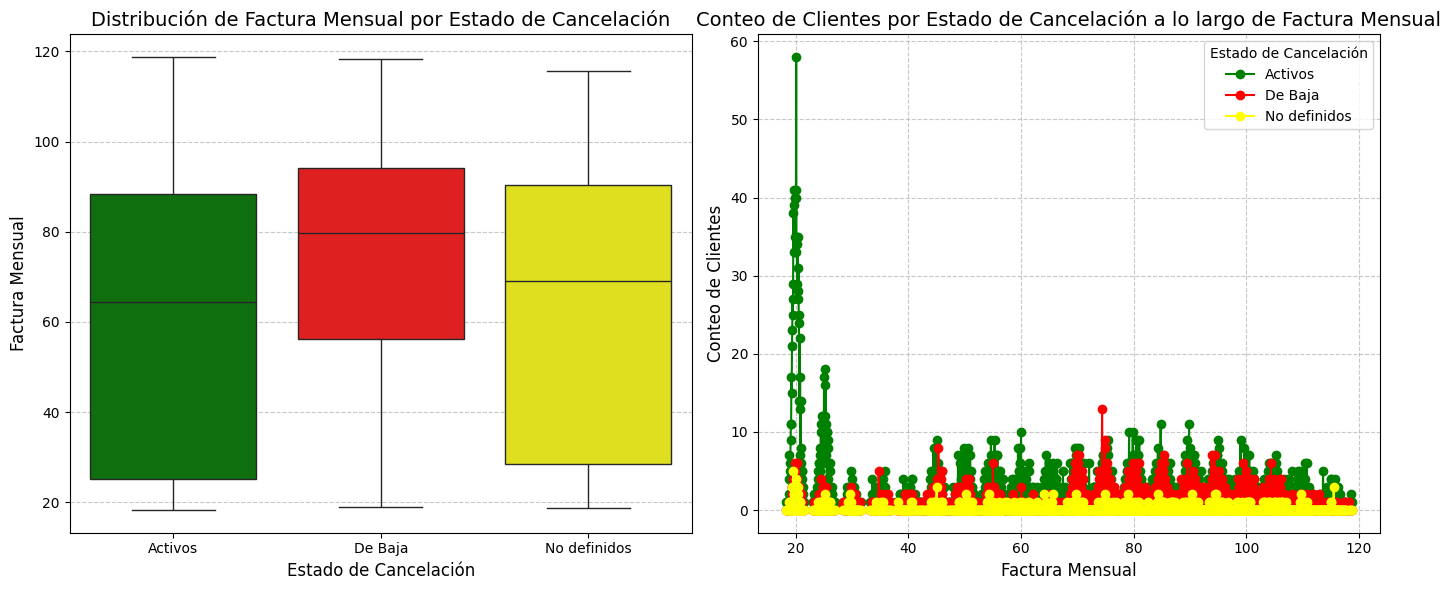

/tmp/ipython-input-74-2850172283.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




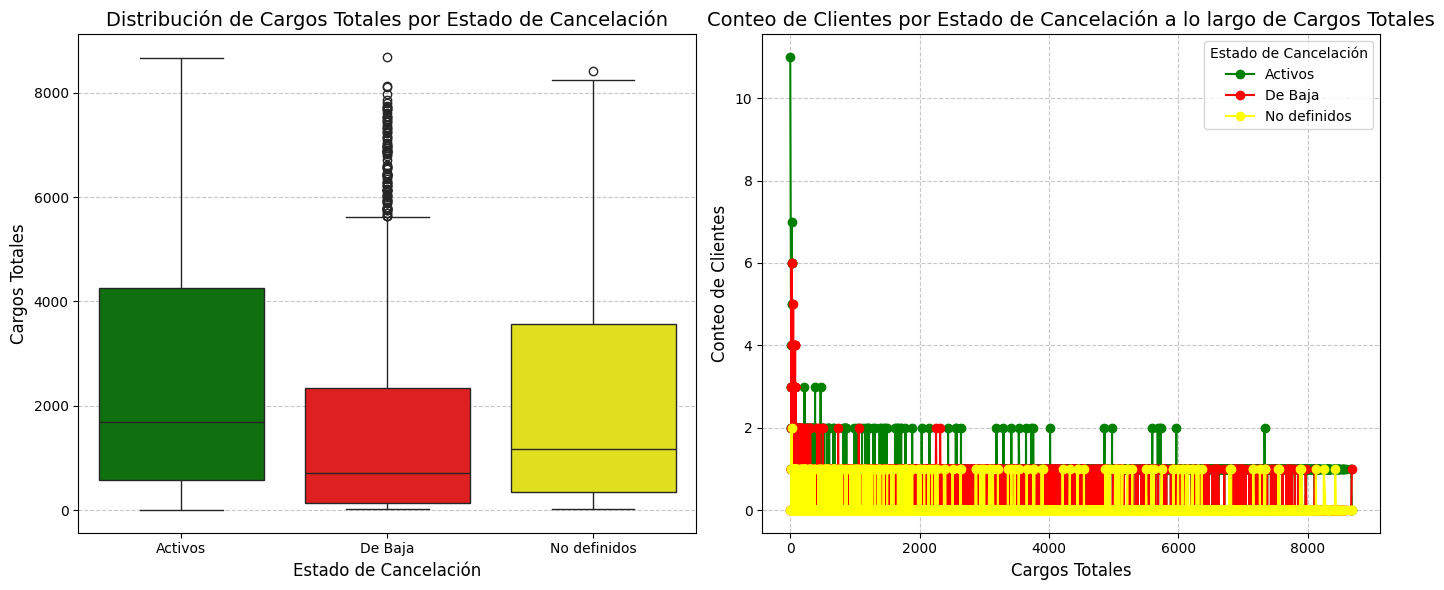

/tmp/ipython-input-74-2850172283.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




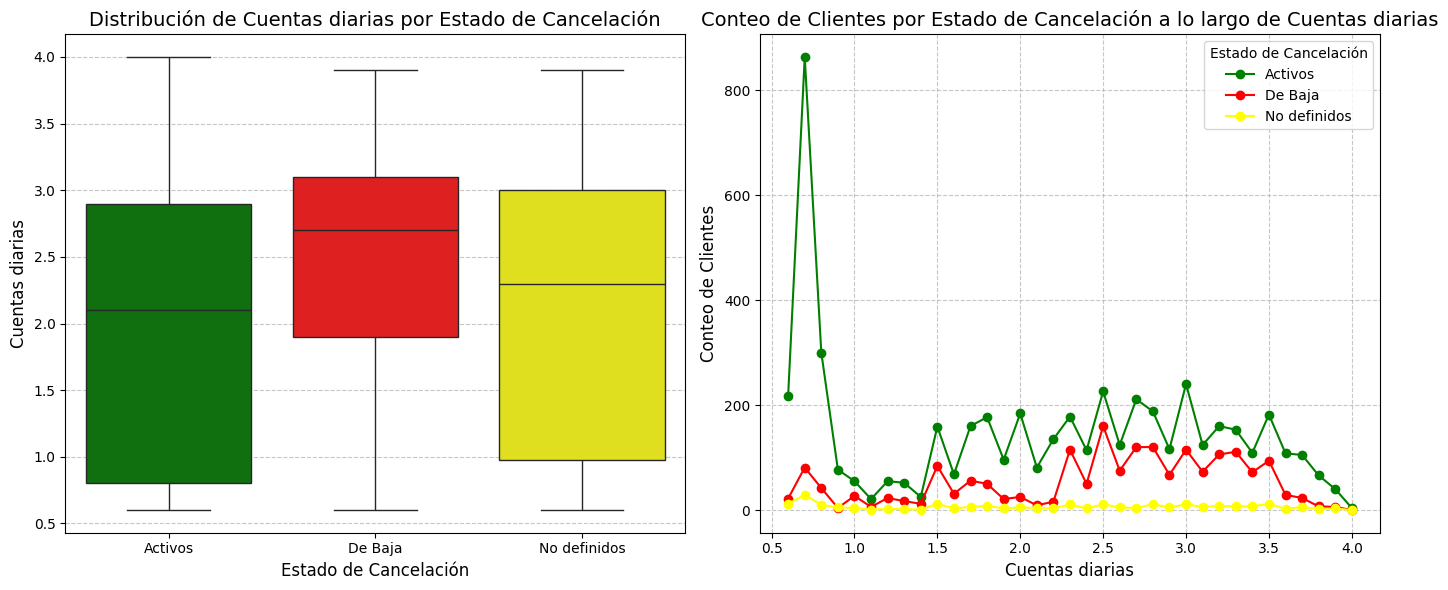

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_numerical_churn_analysis(df, numerical_column):
    """
    Genera un gráfico con dos subplots: un boxplot de una columna numérica vs. cancelación,
    y un gráfico de líneas mostrando el conteo de cada estado de cancelación a lo largo
    de los valores de la columna numérica.

    Args:
        df (pd.DataFrame): DataFrame de entrada con los datos de clientes.
        numerical_column (str): Nombre de la columna numérica a analizar.
    """
    if numerical_column not in df.columns:
        print(f"Error: La columna '{numerical_column}' no existe en el DataFrame.")
        return

    cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
    churn_text_column_name = 'Cancelacion_Text'
    if churn_text_column_name not in df.columns:
         df[churn_text_column_name] = df['Cancelacion'].map(cancellation_map)


    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    plot_colors = {'Activos': 'green', 'De Baja': 'red', 'No definidos': 'yellow'}


    sns.boxplot(x=churn_text_column_name, y=numerical_column, data=df, ax=axs[0], order=['Activos', 'De Baja', 'No definidos'], palette=plot_colors)
    axs[0].set_title(f'Distribución de {numerical_column.replace("_", " ")} por Estado de Cancelación', fontsize=14)
    axs[0].set_xlabel('Estado de Cancelación', fontsize=12)
    axs[0].set_ylabel(numerical_column.replace("_", " "), fontsize=12)
    axs[0].grid(axis='y', linestyle='--', alpha=0.7)



    cancellation_counts_by_numerical = df.groupby([numerical_column, churn_text_column_name]).size().unstack(fill_value=0).reset_index()


    for status, color in plot_colors.items():
        if status in cancellation_counts_by_numerical.columns:
            axs[1].plot(cancellation_counts_by_numerical[numerical_column], cancellation_counts_by_numerical[status],
                        label=status, marker='o', linestyle='-', color=color)


    axs[1].set_title(f'Conteo de Clientes por Estado de Cancelación a lo largo de {numerical_column.replace("_", " ")}', fontsize=14)
    axs[1].set_xlabel(numerical_column.replace("_", " "), fontsize=12)
    axs[1].set_ylabel('Conteo de Clientes', fontsize=12)
    axs[1].grid(True, linestyle='--', alpha=0.7)
    axs[1].legend(title='Estado de Cancelación')

    plt.tight_layout()

    plt.show()

numerical_cols_to_plot = ['Meses_Contrato', 'Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias']

for col in numerical_cols_to_plot:
    plot_numerical_churn_analysis(df_telecomx_normalized, col)

##Análisis de correlación entre variables

Crear una nueva columna en el DataFrame `df_telecomx_normalized` llamada 'Numero_Servicios' que represente la cantidad de servicios adicionales contratados por cada cliente. Estos servicios adicionales incluyen 'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas', 'Suscripcion_Seguridad_En_Linea', 'Suscripcion_Respaldo_En_Linea', 'Suscripcion_Proteccion_Dispositivo', 'Suscripcion_Soporte_Técnico', 'Suscripcion_TV_Streaming', y 'Suscripcion_Películas_Streaming'. Se deben contar solo los servicios donde el valor es 1 (indicando suscripción 'Yes').


In [ ]:
service_columns = [
    'Suscripcion_Servicio_Telefono',
    'Suscripcion_Multiples_Lineas',
    'Suscripcion_Seguridad_En_Linea',
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Películas_Streaming'
]


df_telecomx_normalized['Numero_Servicios'] = df_telecomx_normalized[service_columns].apply(lambda row: (row == 1).sum(), axis=1)

display(df_telecomx_normalized[['ID_Cliente'] + service_columns + ['Numero_Servicios']].head())

,ID_Cliente,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Numero_Servicios
0,0002-ORFBO,1,0,0,1,0,1,1,0,4
1,0003-MKNFE,1,1,0,0,0,0,0,1,3
2,0004-TLHLJ,1,0,0,0,1,0,0,0,2
3,0011-IGKFF,1,0,0,1,1,0,1,1,5
4,0013-EXCHZ,1,0,0,0,0,1,1,0,3


# Sección nueva

Calcular la matriz de correlación entre todas las variables numéricas en el DataFrame `df_telecomx_normalized`, incluyendo la nueva columna 'Numero_Servicios' y la columna 'Cancelacion'.

In [ ]:
numerical_df = df_telecomx_normalized.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()

display(correlation_matrix)

,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Factura_Electronica,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Numero_Servicios
Cancelacion,1.000000,0.129071,-0.137711,-0.147291,-0.307073,0.014353,0.033953,0.026225,0.069297,0.081239,0.029384,0.149081,0.147698,0.163576,0.173298,-0.171432,0.172484,-0.054040
Adulto_Mayor,0.129071,1.000000,0.022970,-0.212952,0.018187,0.010060,0.115623,0.082444,0.146275,0.140955,0.068386,0.166059,0.175919,0.157734,0.220388,0.104076,0.220128,0.097072
Tiene_Pareja,-0.137711,0.022970,1.000000,0.448900,0.377551,0.018828,0.117067,0.090215,0.089499,0.098300,0.074163,0.079868,0.074049,-0.011201,0.097122,0.315409,0.097215,0.217196
Tiene_Dependientes,-0.147291,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.023195,-0.029402,-0.064207,-0.070022,-0.042790,-0.087142,-0.103102,-0.111752,-0.115832,0.061474,-0.116037,0.020755
Meses_Contrato,-0.307073,0.018187,0.377551,0.159892,1.000000,0.010205,0.259340,0.231001,0.253037,0.253381,0.227794,0.200411,0.204225,0.007949,0.247982,0.825407,0.247966,0.523853
Suscripcion_Servicio_Telefono,0.014353,0.010060,0.018828,-0.003863,0.010205,1.000000,0.675964,-0.160843,-0.130208,-0.143747,-0.163279,-0.110570,-0.116135,0.013624,0.246709,0.113985,0.248399,0.125988
Suscripcion_Multiples_Lineas,0.033953,0.115623,0.117067,-0.023195,0.259340,0.675964,1.000000,0.068373,0.131296,0.123694,0.066823,0.163714,0.161845,0.131590,0.490385,0.412122,0.490556,0.471508
Suscripcion_Seguridad_En_Linea,0.026225,0.082444,0.090215,-0.029402,0.231001,-0.160843,0.068373,1.000000,0.706885,0.702443,0.736278,0.663421,0.668783,0.188463,0.637022,0.483112,0.635491,0.653647
Suscripcion_Respaldo_En_Linea,0.069297,0.146275,0.089499,-0.064207,0.253037,-0.130208,0.131296,0.706885,1.000000,0.713219,0.709105,0.704216,0.701708,0.265546,0.711359,0.538664,0.709785,0.691606
Suscripcion_Proteccion_Dispositivo,0.081239,0.140955,0.098300,-0.070022,0.253381,-0.143747,0.123694,0.702443,0.713219,1.000000,0.725487,0.750166,0.753714,0.249061,0.738000,0.546512,0.736733,0.729579


Generar un mapa de calor (heatmap) de la matriz de correlación calculada en el paso anterior (`correlation_matrix`) para visualizar las relaciones entre las variables numéricas.


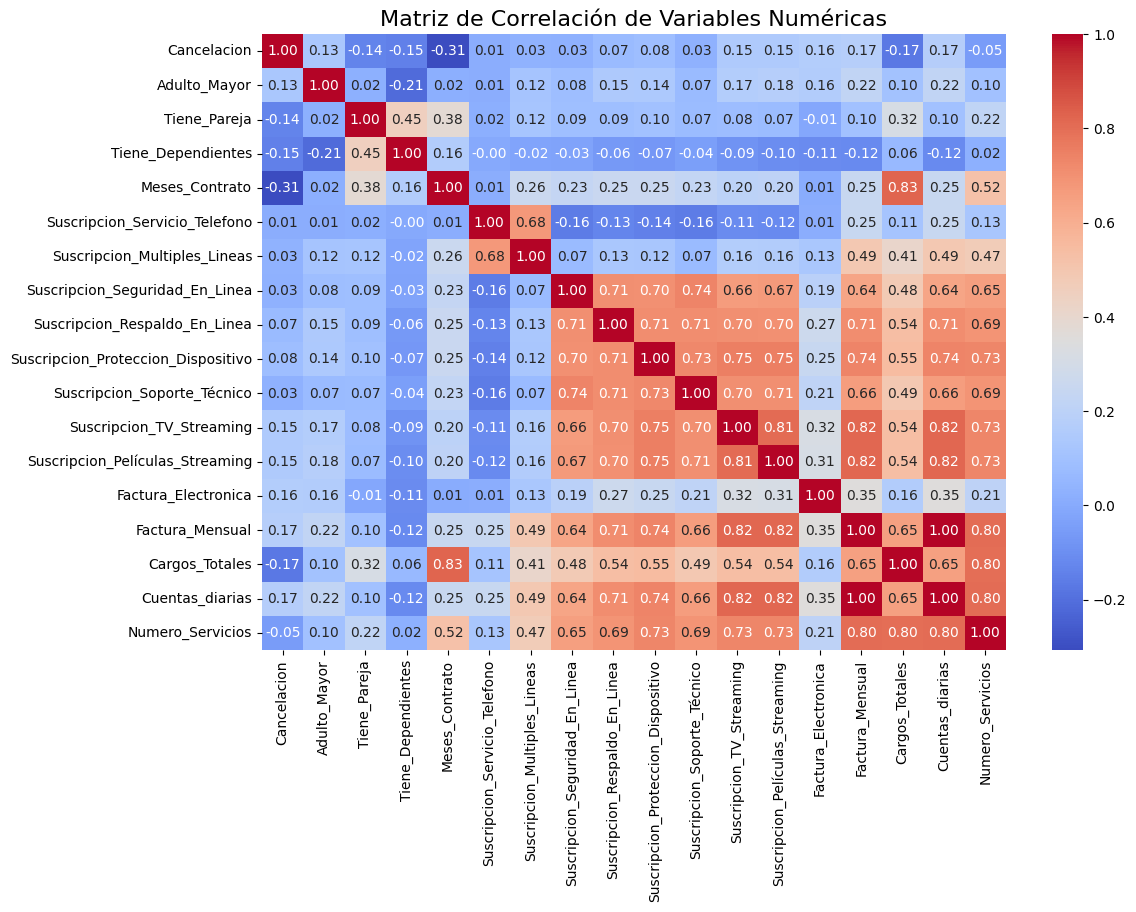

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)

# Display the plot
plt.show()

#📄Informe final

# 📈 Informe Final – Análisis de Evasión de Clientes: Telecom X

# 🌐 Presentación Final del Proyecto: Análisis de Evasión de Clientes

## 🚀 1. Introducción

**Empresa:** Telecom X\
**Problema:** Alta tasa de cancelación de clientes (churn)\
**Objetivo del proyecto:** Identificar factores asociados a la cancelación para diseñar estrategias de retención y soporte para modelos predictivos.

## 🛠️ 2. Metodología

- Importación de datos (API/CSV)
- Limpieza y normalización de variables
- Análisis Exploratorio de Datos (EDA)
- Visualización de patrones y tendencias
- Análisis de correlación
- Generación de hallazgos y recomendaciones

## 📊 3. Distribución de Cancelación

- Activos: **71.2%**
- De Baja: **25.7%**
- Cancelación desconocida: **3.08%**

❌ Una de cada cuatro personas se da de baja: foco de acción estratégica.

## 🔹 4. Análisis por Variables Personales

| Variable        | Mayor churn en... | Porcentaje |
| --------------- | ----------------- | ---------- |
| No Adulto Mayor | Menores de 65     | 40.3%      |
| Pareja          | Sin pareja        | 32%        |
| Dependientes    | Sin dependientes  | 30.3%      |
| Factura         | Electrónica       | 32.5%      |

- **Adulto Mayor**: menor tasa de cancelación (22.9%) vs. no adultos mayores (40.3%).
- **Tiene Pareja**: sin pareja tienen mayor churn (32%) que quienes sí tienen (19%).
- **Tiene Dependientes**: sin dependientes → 30.3% de churn vs. 14.9% con dependientes.
- **Factura Electrónica**: mayor churn (32.5%) que quienes reciben factura física (15.9%).

🔎 Perfil de mayor riesgo: Jóvenes, solteros, sin dependientes y digitales.

## 👥 5. Variables Categóricas relevantes

- **Género**: no influye significativamente (cancelación similar).
- **Tipo de Internet**: Fibra óptica con mayor cancelación (40.6%).
- **Tipo de contrato**: mensual → 41.3% de churn. Contratos a 1 o 2 años
  - Mensual: 41.3% e churn.(alto riesgo)
  - 1 año: 3%
  - 2 años: 1.9%
- **Método de pago:**
  - Electronic Check: 43.8% (alto riesgo)

## 📊 6. Análisis de Variables Numéricas

- Clientes que cancelan tienen:
  - **Meses de contrato**: clientes que cancelan lo hacen en los primeros meses.
  - **Factura mensual**: mediana más alta en clientes cancelados.
  - **Cargos totales**: menores en quienes cancelan temprano.
  - **Cargos diarios**: patrón similar a cargos totales.

📊 Boxplots muestran patrones visuales claros entre activos y cancelados.

## 🔄 7. Correlación de Variables
Se exploró la correlación entre variables numéricas para detectar patrones que ayuden a construir modelos predictivos.

- El heatmap mostró correlaciones relevantes:
  - **Meses_Contrato** y **Cargos_Totales**: alta correlación positiva.
  - **Cantidad_Servicios** tiene correlación negativa con churn.
  - **Cuenta_Diaria** se relaciona con otros indicadores de gasto.

Este análisis refuerza que mayor compromiso (más meses o más servicios) está asociado con menor riesgo de cancelación.

🔍 Ayuda a seleccionar variables clave para modelos predictivos.

## 📊 8. Conclusiones e Insights

- Clientes con menos compromiso **jóvenes**, **solteros**, **sin dependientes**, y que **reciben factura online** muestran tasas de cancelación más altas.
- El **tipo de contrato** es un fuerte predictor de churn. Contratos mensuales están más expuestos a cancelaciones.
- Factura electrónica y método de pago electrónico se asocian a mayores cancelaciones.
- Contratos largos retienen más clientes.

- Las variables numéricas refuerzan la idea de que los clientes cancelan en las primeras etapas de su contrato.


## 📉 9. Recomendaciones Estratégicas
- ✉️ Fomentar **contratos a largo plazo (anuales/bianuales)** con incentivos o beneficios exclusivos.
- Crear campañas de **retención personalizadas** para clientes con perfil de riesgo alto.
- 🚗 Investigar la experiencia de pago por *Electronic Check* y optimizar el canal si es necesario.
- Desarrollar modelos predictivos de cancelación con estas variables como insumo.
- Explorar más relaciones entre servicios contratados y churn para estrategias de satisfaccion del cliente.


## 🙌 10. Conclusión

Este análisis permite entender mejor los factores asociados a la cancelación de clientes, y es una base sólida para:

- Diseñar campañas de retención efectivas
- Reducir el churn
- Construir modelos de predicción para decisiones estratégicas


